## Display Deep Learning Model Training History

One of the default callbacks that is registered when training all deep learning models is the History callback.   
It records training metrics for each epoch.   
This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.

The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

We can use the data collected in the history object to create plots.

The plots can provide an indication of useful things about the training of the model, such as:

* It’s speed of convergence over epochs (slope).
* Whether the model may have already converged (plateau of the line).
* Whether the mode may be over-learning the training data (inflection for validation line).
* And more.

### Import Classes and Functions

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


### Load The Dataset

In [2]:
df = pd.read_csv('../datasets/pima-indians-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Split into input (X) and output (Y) variables

In [3]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure',
               'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

# Keras and Tensorflow need numpy array as input
X = X.as_matrix()
Y = y.as_matrix()

### Define the Neural Network Model

In [4]:
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(8, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))

### Compile model

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the model

In [6]:
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

### List all data in history

In [7]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_acc', 'val_loss'])


### Summarize history for accuracy

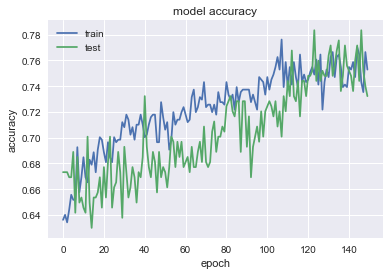

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Summarize history for loss

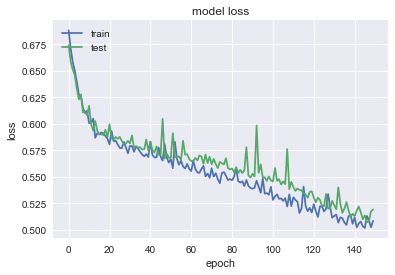

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()